In [ ]:
import numpy as np
import pandas as pd
import re

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Bidirectional,LSTM, Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/train_text_emoji_clean.csv")
test = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/test_text_emoji_clean.csv")
valid = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/valid_text_emoji_clean.csv")

In [ ]:
def process(sen):
  if ":" in sen:
    sentence =sen[sen.index(":")+1:]
    return sentence
  return sen

def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

#Pre-processing
#train["tweets"] = train["tweets"].apply(process)
#train["tweets"] = test["tweets"].apply(process)

train["tweets"] = train["tweets"].apply(preprocess_text)
test["tweets"] = test["tweets"].apply(preprocess_text)
valid['tweets'] = valid['tweets'].apply(preprocess_text)

X_train = train['tweets']
Y_train = train['labels']

X_test = test['tweets']
Y_test = test['labels']

X_valid = valid['tweets']
Y_valid = valid['labels']

Y_test = np_utils.to_categorical(Y_test)
Y_train = np_utils.to_categorical(Y_train)
Y_valid = np_utils.to_categorical(Y_valid)

TypeError: ignored

In [ ]:
# Splitting the train data from sentences to words
for i in range(X_train.shape[0]):
    X_train[i] = X_train[i].split()

# Splitting the test data from sentences to words
for i in range(X_test.shape[0]):
    X_test[i] = X_test[i].split()

# Splitting the validation data from sentences to words
for i in range(X_valid.shape[0]):
    X_valid[i] = X_valid[i].split()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added b

In [ ]:
# To check maximum length of sentence in training data
np.unique(np.array([len(ix) for ix in X_train]) , return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 array([   1, 2051, 4179, 4336, 4397, 4407, 4034, 3561, 3113, 2825, 2560,
        2366, 2100, 1803, 1706, 1363, 1221, 1096,  925,  811,  735,  709,
         523,  502,  405,  329,  246,  203,  146,  105,   69,   31,   17,
           5,    4,    1]))

In [ ]:
# To check maximum length of sentence in testing data
np.unique(np.array([len(ix) for ix in X_valid]) , return_counts=True)

#np.unique(np.array([len(ix) for ix in X_train]) , return_counts=True)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35]),
 array([ 541, 1036, 1066, 1117, 1097, 1004,  901,  873,  788,  676,  553,
         503,  446,  387,  389,  304,  277,  271,  203,  169,  187,  152,
         122,   98,   97,   82,   50,   36,   22,   18,    5,    7,    3,
           1]))

In [ ]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove*.zip

--2021-10-21 02:12:00--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2021-10-21 02:12:00--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2021-10-21 02:12:01--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [ ]:
# Creating  embeddings dictionary with key = word and value = list of words in glove vector
embeddings_index = {}

f = open('glove.twitter.27B.100d.txt', encoding = "utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
# Checking length of a particular word
embeddings_index["i"].shape

embeddings_index["c"].shape

(100,)

In [ ]:
# Filling the embedding matrix
x = embeddings_index["."]
x[x != 0] = 0

embedding_matrix_train = np.zeros((X_train.shape[0], 35, 100))
embedding_matrix_test = np.zeros((X_test.shape[0], 35, 100))
embedding_matrix_valid = np.zeros((X_valid.shape[0], 35, 100))

count = 0

for i in range(X_train.shape[0]):
    for j in range(len(X_train[i])):
        if (X_train[i][j].lower() in embeddings_index.keys()):
            embedding_matrix_train[i][j] = embeddings_index[X_train[i][j].lower()]
        else:
            embedding_matrix_train[i][j] = x
        
for i in range(X_test.shape[0]):
    for j in range(len(X_test[i])):
        if (X_test[i][j].lower() in embeddings_index.keys()):
            embedding_matrix_test[i][j] = embeddings_index[X_test[i][j].lower()]
        else: 
            embedding_matrix_test[i][j] = x

for i in range(X_valid.shape[0]):
    for j in range(len(X_valid[i])):
        if (X_valid[i][j].lower() in embeddings_index.keys()):
            embedding_matrix_valid[i][j] = embeddings_index[X_valid[i][j].lower()]
        else: 
            embedding_matrix_valid[i][j] = x

In [ ]:
# A simple LSTM network
model = Sequential()
model.add(LSTM(128, input_shape=(35,100),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(12))
model.add(Activation('softmax'))

In [ ]:
#Test
model = Sequential()
model.add(Bidirectional(LSTM(128, input_shape=(35,100),return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('softmax'))

In [ ]:
# Setting Loss ,Optimiser for model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras import callbacks

early_stopping_1 = callbacks.EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5, restore_best_weights = True, verbose = 1)

hist = model.fit(embedding_matrix_train,Y_train, validation_data=(embedding_matrix_valid, Y_valid)
                ,epochs = 10, batch_size=32,shuffle=True, callbacks = [early_stopping_1]
                )

Epoch 1/10
1653/1653 [==============================] - 323s 182ms/step - loss: 2.2777 - accuracy: 0.1841 - val_loss: 2.2329 - val_accuracy: 0.1984
Epoch 2/10
1653/1653 [==============================] - 300s 181ms/step - loss: 2.1764 - accuracy: 0.2268 - val_loss: 2.2084 - val_accuracy: 0.2084
Epoch 3/10
1653/1653 [==============================] - 301s 182ms/step - loss: 2.1294 - accuracy: 0.2523 - val_loss: 2.1405 - val_accuracy: 0.2502
Epoch 4/10
1653/1653 [==============================] - 301s 182ms/step - loss: 2.0881 - accuracy: 0.2750 - val_loss: 2.1016 - val_accuracy: 0.2825
Epoch 5/10
1653/1653 [==============================] - 300s 182ms/step - loss: 2.0454 - accuracy: 0.2914 - val_loss: 2.1498 - val_accuracy: 0.2575
Epoch 6/10
1653/1653 [==============================] - 300s 181ms/step - loss: 2.0038 - accuracy: 0.3090 - val_loss: 2.0794 - val_accuracy: 0.2843
Epoch 7/10
1653/1653 [==============================] - 299s 181ms/step - loss: 1.9633 - accuracy: 0.3258 - val_

In [ ]:
#Without glove embedding
EMBEDDING_DIM = 100


model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.5,return_sequences=True)))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('softmax'))

In [ ]:
Y_test = np_utils.to_categorical(Y_test)

In [ ]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 35, 128)           117248    
_________________________________________________________________
dropout_20 (Dropout)         (None, 35, 128)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 35, 128)           131584    
_________________________________________________________________
dropout_21 (Dropout)         (None, 35, 128)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 12)               

In [ ]:
score1 = model.evaluate(embedding_matrix_test, Y_test)

print("Test Score:", score1[0])
print("Test Accuracy:", score1[1])
print(score1)
print(model.metrics_names)

422/422 [==============================] - 19s 44ms/step - loss: 2.1855 - accuracy: 0.2680
Test Score: 2.1854522228240967
Test Accuracy: 0.2680014967918396
[2.1854522228240967, 0.2680014967918396]
['loss', 'accuracy']


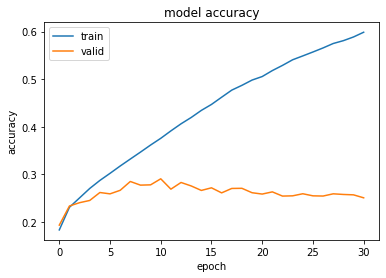

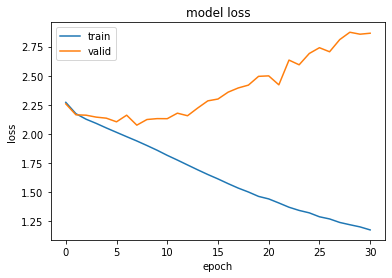

In [ ]:
#Plotting epoch graph
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [ ]:
# Save the entire model as a SavedModel.
#!mkdir -p saved_model
#model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
# Prediction of the trained model 
pred = model.predict(embedding_matrix_test)

In [ ]:
# Calculating the accuracy of the algorithm
float(sum(np.argmax(pred)==Y_test))/embedding_matrix_test.shape[0]

0.0

In [ ]:
b = 0
for i in range(len(pred)):
  if (np.argmax(pred[i]) == Y_test[i]):
    b += 1
  else:
    continue

b/len(Y_test)

0.26192065257693736